#0. Computer Vision libaries in PyTorch
`torchvision` - bese domaon library for PyTorch computer vision

`torchvision.datasets` - Get datasets and data loading function for computer vision here

`torchvision.models` - Get pre-trained computer visios model

`torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model

`torch.utils.data.Dataset` - Base dataset class for PyTorch.

`torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


# 1.Getting a dataset
https://pytorch.org/vision/main/datasets.html

In [ ]:
##setup traing data
train_data = datasets.FashionMNIST(
    root = "data",#where to download data to?
    train = True,#do you want to training dataset yes = True no = Flsae
    download = True,#want to download?
    transform = torchvision.transforms.ToTensor(),#how do you want to transform the data
    target_transform = None # how do we want to tranfrom the labels/targets?
)


100%|██████████| 26421880/26421880 [00:36<00:00, 716434.08it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202944.09it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3791336.73it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7084080.38it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
##setup test data
test_data = datasets.FashionMNIST(
    root = "data",#where to download data to?
    train = False,#do you want to training dataset yes = True no = Flsae
    download = True,#want to download?
    transform = ToTensor(),#how do you want to transform the data
    target_transform = None # how do we want to tranfrom the labels/targets?
)

In [ ]:
len(train_data), len(test_data) # ชุดข้อมูลการฝึก (train_data) มีจำนวน 60,000 ตัวอย่างและชุดข้อมูลการทดสอบ (test_data) มีจำนวน 10,000 ตัวอย่าง

(60000, 10000)

In [ ]:
image, label = train_data[0]#เข้าถึงชื่อคลาสทั้งหมดจาก train_data และเก็บไว้ในตัวแปร class_names

image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

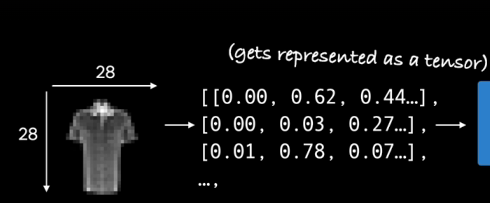

In [ ]:
class_name = train_data.classes #
class_name,label

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 9)

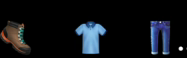

In [ ]:
class_to_idx = train_data.class_to_idx #เข้าถึงดิกชันนารีที่แมปชื่อคลาสเป็นตัวเลขป้ายกำกับในชุดข้อมูลการฝึก (training data)
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets#ใช้เพื่อเข้าถึงข้อมูลป้ายกำกับ (labels) ของตัวอย่างทั้งหมดในชุดข้อมูลการฝึก (training data)

tensor([9, 0, 0,  ..., 3, 0, 5])

##1.1 Check input and output shapes of data

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_name[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


##1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


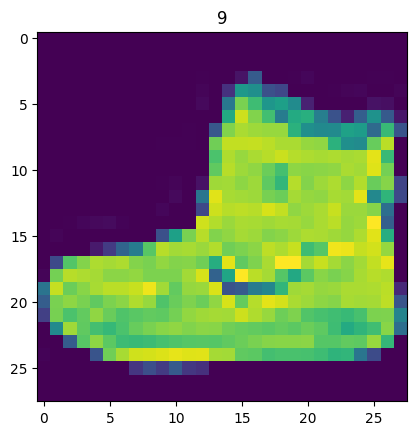

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_name[label]}")
plt.title(label)
plt.imshow(image.squeeze()) #ลบมิติออกไปไม่เช่นนั้นจะเกิดข้อผิดพลาด


(-0.5, 27.5, 27.5, -0.5)

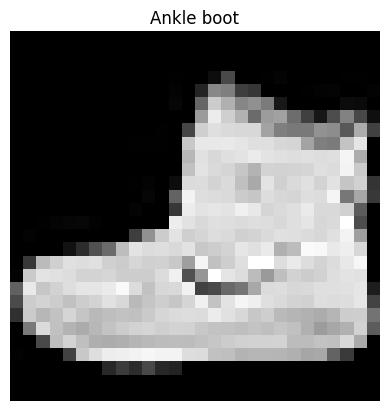

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False) #ใช้เพื่อซ่อนแกนของกราฟใน matplotlib ครับ

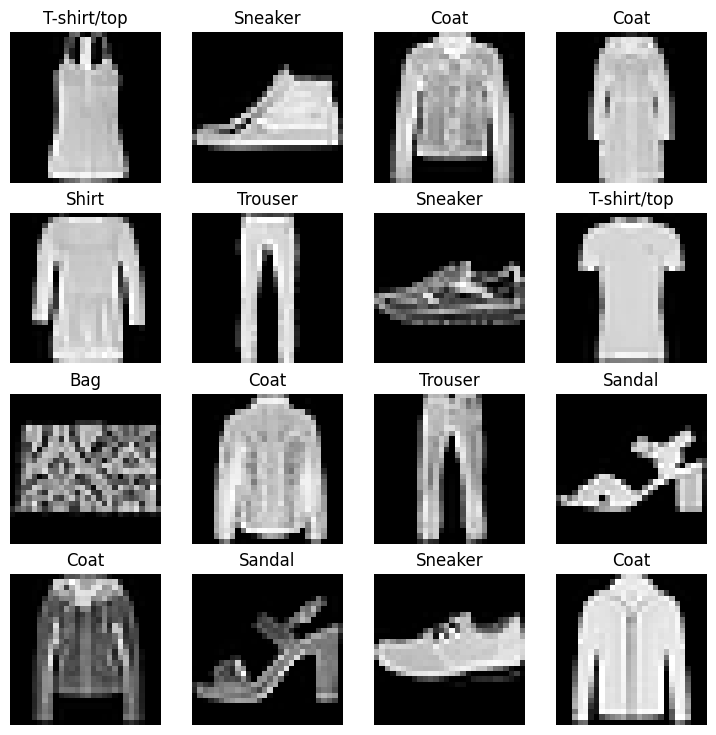

In [ ]:

# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))# สร้าง figure object ของ matplotlib ขนาด 9x9 นิ้ว (ขนาดรูปภาพที่จะแสดง)
rows, cols = 4, 4#กำหนดจำนวนแถวและคอลัมน์ของ subplot ในกราฟเป็น 4x4
for i in range(1, rows*cols+1):#วนลูปเพื่อสร้าง subplot ทั้งหมด 16 ช่อง (เนื่องจาก rows*cols = 16)
  random_idx = torch.randint(0, len(train_data), size=[1]).item()# สุ่มเลือกอินเด็กซ์ของข้อมูลจากชุดฝึก train_data
  #โดยใช้ torch.randint โดยขนาดตัวอย่างเท่ากับ 1
  img, label = train_data[random_idx]#ดึงข้อมูลภาพและป้ายกำกับจาก train_data ที่ random_idx ที่เลือกมา
  fig.add_subplot(rows, cols, i)#เพิ่ม subplot ลงใน figure ที่ได้สร้างไว้ ในตำแหน่งที่ i (ที่กำหนดในลูป)
  plt.imshow(img.squeeze(), cmap="gray")#แสดงภาพ img โดยใช้ plt.imshow โดยการใช้ cmap="gray" เพื่อแสดงภาพในลักษณะขาวดำ (grayscale)
  plt.title(class_name[label])#กำหนดชื่อของ subplot จาก class_name ที่มี index เป็น label
  plt.axis(False);#ซ่อนแกนของ subplot เพื่อให้ภาพไม่มีกรอบและไม่มีตัวอ้างอิงตำแหน่งใดๆ

In [ ]:
train_data, test_data# ชุดข้อมูลการฝึก (train_data) มีจำนวน 60,000 ตัวอย่างและชุดข้อมูลการทดสอบ (test_data) มีจำนวน 10,000 ตัวอย่าง

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# 2.Prepare DataLoader
ขณะนี้ข้อมูลของเราอยู่ในรูปแบบของ PyTorch Dataset

 และเราต้องการที่จะใช้ DataLoader เพื่อเปลี่ยนข้อมูลเหล่านี้เป็น
 Python iterable (วัตถุที่สามารถวนลูปได้ใน Python)

  โดยเฉพาะเพื่อแบ่งข้อมูลเป็น batch (หรือ mini-batch) ได้

ทำไมเราถึงทำเช่นนี้?

1. **เพื่อประสิทธิภาพทางคำนวณ**: การใช้ DataLoader เพื่อแบ่งข้อมูลเป็น batch ช่วยลดการใช้ทรัพยากรความจำของฮาร์ดแวร์คอมพิวเตอร์ ซึ่งบางครั้งอาจจะไม่สามารถเก็บภาพทั้ง 60,000 ภาพไว้ในหน่วยความจำพร้อมกันได้ ดังนั้นการแบ่งเป็น batch เช่น 32 ภาพต่อ batch จะช่วยให้เครื่องคอมพิวเตอร์สามารถจัดการข้อมูลได้เป็นลำดับ

2. **เพื่อให้โมเดลเรียนรู้ได้ดียิ่งขึ้น**: การใช้ batch ช่วยให้โมเดลได้มีโอกาสอัปเดตค่า gradient หลายครั้งต่อ epoch ซึ่งช่วยให้โมเดลเรียนรู้ได้มีประสิทธิภาพมากขึ้น

ดังนั้นการใช้ DataLoader เป็นขั้นตอนที่สำคัญในการเตรียมข้อมูลสำหรับการฝึกโมเดล neural network ในการเรียนรู้เชิงลึก (deep learning)

In [ ]:
from torch.utils.data import DataLoader
#set up batch size
BATCH_SIZE = 32
# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cca045f63e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7cca0458a320>)

In [ ]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7cca045f63e0>, <torch.utils.data.dataloader.DataLoader object at 0x7cca0458a320>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


Length of train_dataloader: 1875 batches of 32...

จะท่ากับ 60000/32 = 1872 batches จำนวนครั้นในการดูรูปภาพในแต่ล่ะ1ครั้ง

Length of test_dataloader: 313 batches of 32...

จะท่ากับ 10000/32 = 313 batches จำนวนครั้นในการดูรูปภาพในแต่ล่ะ1ครั้ง


In [ ]:
# Check out what's inside the training dataloader

# ใช้ next(iter(train_dataloader)) เพื่อดึง batch แรกออกมาจาก train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# พิมพ์รูปร่างของ train_features_batch และ train_labels_batch
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


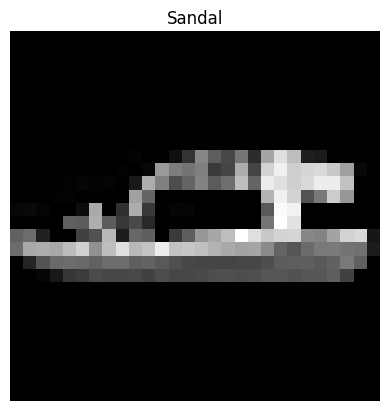

In [ ]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

# เลือกภาพและป้ายกำกับจากชุดข้อมูล
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# แสดงภาพโดยใช้ plt.imshow ในโหมด grayscale (cmap="gray")
plt.imshow(img.squeeze(), cmap="gray")

# กำหนดหัวเรื่องของภาพเป็นชื่อคลาสที่สอดคล้องกับป้ายกำกับ
plt.title(class_name[label])

# ซ่อนแกนของภาพเพื่อให้ไม่มีกรอบและไม่มีเลขลำดับตำแหน่ง
plt.axis(False)

# พิมพ์ขนาดของภาพ
print(f"Image size: {img.shape}")

# พิมพ์ป้ายกำกับและขนาดของป้ายกำกับ
print(f"Label: {label}, label size: {label.shape}")


# 3.Model 0: Build a basline model
`ขั้นตอนการสร้างโมเดลพื้นฐาน (Model 0)`

เมื่อเริ่มต้นสร้างชุดการทดลองการสร้างแบบจำลองการเรียนรู้ของเครื่อง (machine learning) การเริ่มต้นด้วยโมเดลพื้นฐาน (baseline model) เป็นแนวทางปฏิบัติที่ดี

โมเดลพื้นฐานคือโมเดลที่ง่ายซึ่งคุณจะพยายามปรับปรุงให้ดีขึ้นด้วยโมเดล/การทดลองต่อ ๆ ไป

กล่าวอีกนัยหนึ่งคือ: เริ่มต้นด้วยความเรียบง่ายและเพิ่มความซับซ้อนเมื่อจำเป็น



`nn.Flatten() ใน PyTorch เป็นเลเยอร์ที่แปลงข้อมูล tensor หลายมิติ (เช่น รูปภาพ 2D หรือ 3D) ให้เป็นข้อมูล 1 มิติ (1D) เพื่อเตรียมพร้อมสำหรับการป้อนเข้าไปยังเลเยอร์ Fully Connected (Linear Layer) ในโมเดล neural network`

In [ ]:
#ขั้นตอนนี้มีการสร้างชั้น (layer) สำหรับการแปลงข้อมูล (flatten layer) และทดสอบการทำงานของมันโดยการแปลงรูปภาพจากขนาดดั้งเดิมเป็นขนาดแบบแบน (flatten

In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()
#สร้างชั้น Flatten โดยใช้ nn.Flatten() จาก PyTorch ซึ่งจะทำการแปลงข้อมูลหลายมิติ (เช่น [color_channels, height, width]) ให้เป็นข้อมูลแบบแบน (1 มิติ)

#get a single sample
X = train_features_batch[0]
# X,X.shape
#ดึงตัวอย่างข้อมูล (ภาพ) หนึ่งภาพจาก train_features_batch ซึ่งเป็น batch ของภาพในการฝึก (training batch) โดยเลือกภาพที่มีดัชนี (index) เป็น 0

# Flatten the sample
output = flatten_model(X) # perform forward pass
#ใช้ flatten_model เพื่อทำการแปลงข้อมูล X ซึ่งเป็นภาพ 3 มิติ (color_channels, height, width) ให้เป็นข้อมูลแบบแบน (1 มิติ) และเก็บผลลัพธ์ในตัวแปร output

# Print out what happened
print(f"Shape before flattening: {X.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

#ขั้นตอนนี้สร้างชั้น Flatten เพื่อทำการแปลงภาพจากขนาดดั้งเดิมที่เป็น 3 มิติ (เช่น [color_channels, height, width]) ให้เป็นข้อมูลแบบแบน (1 มิติ) และทดสอบการแปลงนี้โดยการดูขนาดของข้อมูลก่อนและหลังการแปลง

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn

# สร้างคลาสโมเดลสำหรับ FashionMNIST
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        # สร้างชุดชั้น (layer stack) สำหรับโมเดล
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # ชั้น Flatten เพื่อแปลงภาพจาก 3 มิติ (channels, height, width) เป็น 1 มิติ
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # ชั้น Linear ที่มี input จากจำนวนพิกเซลทั้งหมด ไปยังจำนวน hidden_units
            nn.Linear(in_features=hidden_units, out_features=output_shape)  # ชั้น Linear ที่มี input จาก hidden_units ไปยัง output ที่เป็นจำนวนคลาส
        )

    def forward(self, x):
        # กำหนด forward pass โดยส่งข้อมูลผ่าน layer stack
        return self.layer_stack(x)


In [ ]:
# กำหนด seed สำหรับการสุ่มใน PyTorch เพื่อให้ได้ผลลัพธ์เดียวกันทุกครั้งที่รันโค้ดนี้
torch.manual_seed(42)

# สร้างอินสแตนซ์ของโมเดล FashionMNISTModelV0 และส่งไปยังอุปกรณ์ CPU
model_0 = FashionMNISTModelV0(input_shape=784,  # ขนาดของ input (28x28 พิกเซล = 784)
                               hidden_units=10,  # จำนวนหน่วยในชั้นซ่อน (hidden layer)
                               output_shape=len(class_name)  # จำนวนคลาส (เช่น 10 คลาสสำหรับ MNIST)
                              ).to("cpu")  # ส่งโมเดลไปยัง CPU
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x_model_0 = torch.rand([1, 1, 28, 28])
model_0(dummy_x_model_0)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()
# model_0.state_dict() จะคืนค่า dictionary ของพารามิเตอร์ทั้งหมดในโมเดล model_0 ซึ่งประกอบด้วยค่า weights และ biases ของชั้นต่าง ๆ ในโมเดล

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

##3.1.Setup loss, optimizer and evaluation
1. Loss Function
ใช้ nn.CrossEntropyLoss() เนื่องจากเรากำลังทำงานกับปัญหาการจำแนกหลายคลาส

2. Optimizer
ใช้ torch.optim.SGD() (stochastic gradient descent) เป็น optimizer สำหรับการปรับปรุงพารามิเตอร์ของโมเดล

3. Evaluation Metric
ใช้ Accuracy เป็น metric สำหรับการประเมินผลเนื่องจากเป็นปัญหาการจำแนกประเภท (classification problem)

In [ ]:
from urllib import request
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request.urlretrieve(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py",
                     filename="helper_functions.py")
  with open("helper_functions.py", "r") as f:
    print(f.read())

"""
A series of helper functions used throughout the course.

If a function gets defined once and could be used over and over, it'll go in here.
"""
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
    dir_path (str): target directory

    Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decis

In [ ]:
# cal Accuracy
# def accuracy_fn(y_true, y_pred):
#   correct = torch.eq(y_true, y_pred).sum().item()
#   acc = (correct/len(y_pred)) * 100
#   return acc

In [ ]:
#import accuracy metric
from helper_functions import accuracy_fn

#set up loss function
loss_fn = nn.CrossEntropyLoss()

#set up optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


##3.2 Creating a function to time our experiments
Machine learning is very experimental.

Two of the main things you'll often want to track are:

* 1. Model's performance (loss and accuracy values etc)

* 2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.1063000000795e-05

##3.3 Creating a training loop and training a model on batches of data
* Loop through epochs.

* Loop through training batches, perform training steps, calculate the train loss per batch.

* Loop through testing batches, perform testing steps, calculate the test loss per batch.

* Print out what's happening.

* Time it all (for fun).

In [ ]:
#import tqdm for porgress bar
from tqdm.auto import tqdm

# set the seed
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set number of epoch
epochs = 3

#create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

# trainting
  train_loss = 0

#create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0
  #add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred = model_0(X)

    #2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #6. Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1 Forward pass
      test_pred = model_0(X)
      # 2 Calculate the loss
      test_loss += loss_fn(test_pred, y)
      # 3 Calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
  # Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Epoch: 1
-------
Epoch: 2
-------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 29.618 seconds


# 4.Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

# 5.Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
!nvidia-smi

Fri Jun 21 04:10:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 6.Model 1: Building a better model with non-linearity
We learned about the power of non-linearity in notebook 02 - https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity

In [ ]:
from torch import nn

# สร้างคลาสโมเดลสำหรับ FashionMNIST
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        # สร้างชุดชั้น (layer stack) สำหรับโมเดล
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # ชั้น Flatten เพื่อแปลงภาพจาก 3 มิติ (channels, height, width) เป็น 1 มิติ
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # ชั้น Linear ที่มี input จากจำนวนพิกเซลทั้งหมด ไปยังจำนวน hidden_units
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),  # ชั้น Linear ที่มี input จาก hidden_units ไปยัง output ที่เป็นจำนวนคลาส
            nn.ReLU()
        )

    def forward(self, x: torch.tensor):
        # กำหนด forward pass โดยส่งข้อมูลผ่าน layer stack
        return self.layer_stack(x)

In [ ]:
# กำหนด seed สำหรับการสุ่มใน PyTorch เพื่อให้ได้ผลลัพธ์เดียวกันทุกครั้งที่รันโค้ดนี้
torch.manual_seed(42)

# สร้างอินสแตนซ์ของโมเดล FashionMNISTModelV0 และส่งไปยังอุปกรณ์ CPU
model_1 = FashionMNISTModelV1(input_shape=784,  # ขนาดของ input (ขนาดรูป 28x28 px พิกเซล = 784)
                               hidden_units=10,  # จำนวนหน่วยในชั้นซ่อน (hidden layer)
                               output_shape=len(class_name)  # จำนวนคลาส (เช่น 10 คลาสสำหรับ MNIST)
                              ).to(device)  # ส่งโมเดลไปยัง CPU
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
#set up loss function
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
#set up optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


##6.2 Functionizing training and evaluation/testing loops
Let's create a function for:

* training loop - `train_step()`

* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
# trainting
  train_loss, train_acc = 0, 0

 #put model into training mode
  model.train()

  #add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    #1. Forward pass
    y_pred = model(X)

    #2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) #go from logits -> pred

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #6. Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1 Forward pass
      test_pred = model(X)
      # 2 Calculate the loss
      test_loss += loss_fn(test_pred, y)
      # 3 Calculate accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) #go from logits -> pred

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
  # Calculate training time


In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_1 = timer()

#set number of epochs
epochs = 3

#create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_model_1,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.09199 | Train acc: 61.34%

Train loss: 0.45503 | Test loss: 0.95636, Test acc: 65.00%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.78101 | Train acc: 71.93%

Train loss: 0.45503 | Test loss: 0.72227, Test acc: 73.91%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.67027 | Train acc: 75.94%

Train loss: 0.45503 | Test loss: 0.68500, Test acc: 75.02%

Train time on cuda: 32.504 seconds


**บางครั้งขึ้นอยู่กับข้อมูล/ฮาร์ดแวร์ของคุณ คุณอาจพบว่าโมเดลของคุณฝึกได้เร็วกว่าใน CPU มากกว่า GPU**



ทำไมถึงเป็นเช่นนี้?

Overhead ของการคัดลอกข้อมูล/โมเดลไปและกลับจาก GPU:

* การคัดลอกข้อมูลและโมเดลจากหน่วยความจำหลักไปยัง GPU และกลับมาที่หน่วยความจำหลักอาจใช้เวลานาน ในบางกรณี การคัดลอกนี้อาจใช้เวลามากกว่าประโยชน์จากการคำนวณที่ GPU ทำให้รวมเวลาที่ใช้ทั้งหมดมากขึ้น

ความสามารถในการคำนวณของ CPU ดีกว่า GPU:

* ฮาร์ดแวร์ที่คุณใช้อาจมี CPU ที่มีความสามารถในการคำนวณสูงกว่า GPU ดังนั้นในบางกรณี CPU อาจสามารถประมวลผลได้เร็วกว่า GPU โดยเฉพาะอย่างยิ่งเมื่อ GPU มีข้อจำกัดทางด้านการทำงานหรือมีทรัพยากรไม่เพียงพอ

For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [ ]:
def eval_model(model, data_loader, loss_fn, accuracy_fn, device=device): # Added device parameter with default value
    """Evaluates a given model on a given data loader."""
    loss, acc = 0, 0 # Initialize loss and acc
    model.eval()
    with torch.inference_mode():
      for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        # 1 Forward pass
        test_pred = model(X)
        # 2 Calculate the loss
        loss += loss_fn(test_pred, y) # Update loss
        # 3 Calculate accuracy
        acc += accuracy_fn(y_true=y,
                                y_pred=test_pred.argmax(dim=1)) #go from logits -> pred

      # Calculate the test loss average per batch
      loss /= len(test_dataloader)
      # Calculate the test acc average per batch
      acc /= len(test_dataloader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
#Get model_1 result
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

#7.Model 2: Building a Convolutional Neural Network (CNN)
CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.


`CNN (Convolutional Neural Networks) หรือที่รู้จักกันในชื่อ ConvNets เป็นที่รู้จักเนื่องจากความสามารถในการค้นหารูปแบบในข้อมูลเชิงภาพ`

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [ ]:
#สร้างแบบจำลองCNNอิงจาก -> : https://poloclub.github.io/cnn-explainer/
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
      )
    def forward(self, X: torch.Tensor):
      X = self.conv_block_1(X)
      # print(f"Output shape of conv_block_1: {X.shape}")
      X = self.conv_block_2(X)
      # print(f"Output shape of conv_block_2: {X.shape}")
      X = self.classifier(X)
      # print(f"Output classifier : {X.shape}")
      return X

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
#Create a new instance
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_name)).to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape


torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
len(class_name)

10

In [ ]:
model_2.state_dict()

In [ ]:
image.shape

torch.Size([1, 28, 28])

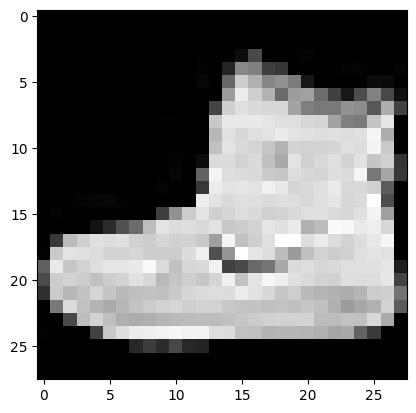

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
random_image = torch.randn(size=(1, 28, 28))
random_image.shape


torch.Size([1, 28, 28])

##7.1 Stepping through `nn.Conv2d()`
See the documentation for nn.Conv2d() here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)
# Create a sinlge conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=15,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape


torch.Size([1, 15, 62, 62])

##7.2 Stepping through nn.MaxPool2d()
https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


##7.3 Setup a loss function and optimizer for model_2

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
model_2.state_dict()

##7.4 Training and testing model_2 using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
model_2_start_time = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

model_2_end_time = timer()
total_train_time_model_2 = print_train_time(start=model_2_start_time,
                                            end=model_2_end_time,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.30123 | Train acc: 89.05%

Train loss: 0.45503 | Test loss: 0.30663, Test acc: 89.18%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.28804 | Train acc: 89.49%

Train loss: 0.45503 | Test loss: 0.30871, Test acc: 88.86%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.27666 | Train acc: 89.95%

Train loss: 0.45503 | Test loss: 0.30498, Test acc: 89.00%

Train time on cuda: 43.544 seconds


In [ ]:
#get model_2 result
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33152249455451965,
 'model_acc': 88.17891373801918}

#8.Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.331522,88.178914


In [ ]:
#Add training_time to show result
compare_results["training_time"] = [total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,29.617832
1,FashionMNISTModelV1,0.685001,75.019968,32.503913
2,FashionMNISTModelV2,0.331522,88.178914,43.543770


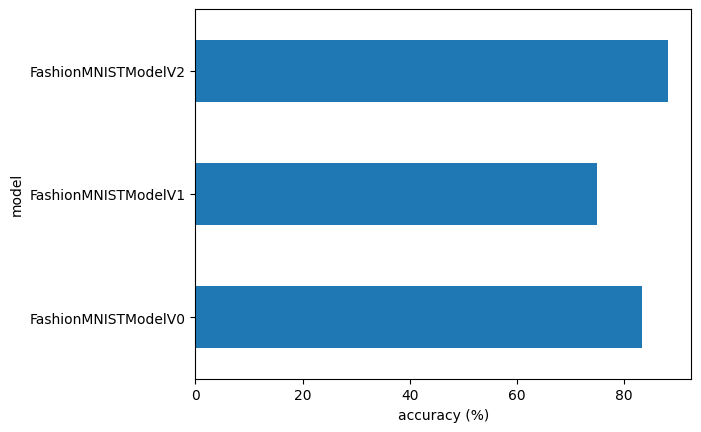

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

#9.Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)
      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # Get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(7)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Shirt')

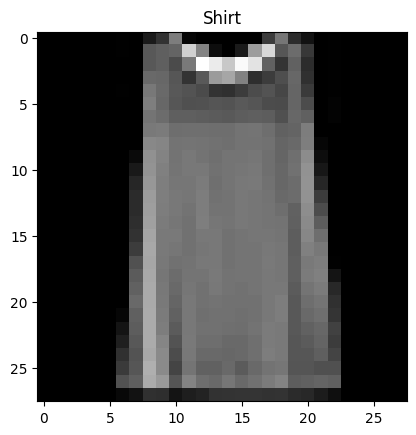

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_name[test_labels[0]])

In [ ]:
#make prediction probabilities to lables
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:10]

tensor([[4.7703e-01, 4.9113e-04, 1.2390e-01, 9.3026e-02, 1.8104e-03, 3.8961e-05,
         3.0210e-01, 5.1699e-05, 1.4998e-03, 4.9034e-05],
        [6.4532e-05, 9.9972e-01, 7.5412e-08, 1.5585e-04, 4.6782e-06, 4.7843e-06,
         4.9724e-05, 1.2485e-06, 1.0100e-06, 2.6540e-07],
        [6.8001e-01, 1.5557e-07, 1.5925e-04, 2.5643e-04, 8.1449e-04, 1.0277e-07,
         3.1838e-01, 1.6407e-08, 3.7302e-04, 2.7907e-08],
        [1.6005e-06, 6.0063e-09, 1.9617e-08, 1.3309e-07, 1.7048e-06, 9.9998e-01,
         9.1358e-06, 1.0947e-07, 9.5538e-06, 5.4022e-08],
        [5.4530e-06, 1.2998e-07, 1.3240e-06, 5.0408e-07, 3.6004e-06, 3.8532e-03,
         4.7172e-06, 1.3311e-03, 1.2163e-04, 9.9468e-01],
        [7.0327e-04, 1.6591e-05, 9.2385e-04, 3.1277e-07, 1.8330e-04, 9.4406e-05,
         2.1328e-03, 4.8644e-05, 9.9549e-01, 4.1056e-04],
        [3.0736e-07, 4.0471e-06, 4.4608e-07, 9.0520e-07, 1.2012e-05, 1.0981e-03,
         5.6360e-08, 9.9868e-01, 4.6920e-05, 1.5797e-04],
        [1.1501e-02, 3.8742

In [ ]:
#convert prediction probabilities to lables
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 1, 0, 5, 9, 8, 7, 8, 8])

In [ ]:
test_labels

[6, 1, 6, 5, 9, 8, 7, 8, 8]

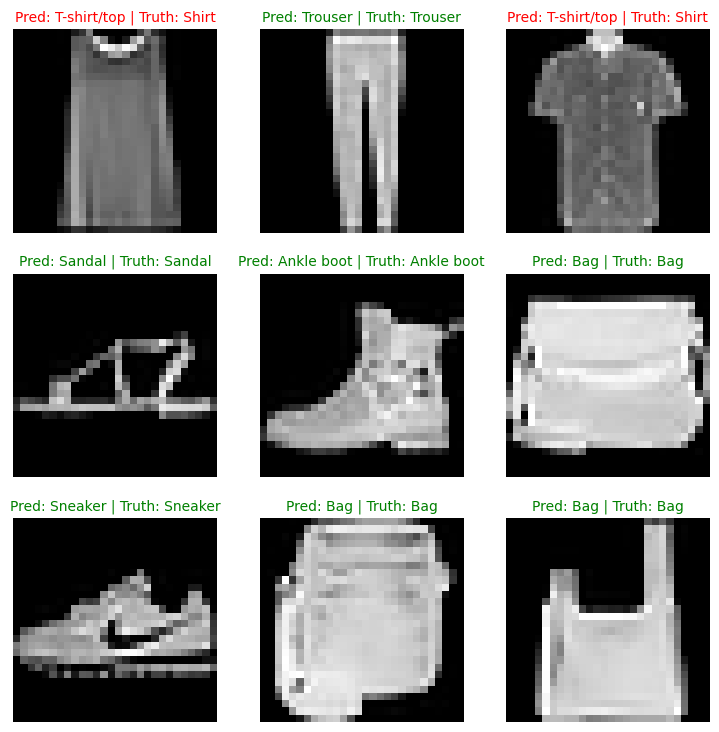

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_name[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

#10.Making a confusion matrix for further prediction evaluation
A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

* 1.Make predictions with our trained model on the test dataset

* 2.Make a confusion matrix torchmetrics.ConfusionMatrix - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html

* 3.Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix() - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [ ]:

# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 4])

In [ ]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [ ]:
import mlxtend


In [ ]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
#2. set up confusion matrix torchmetrics.ConfusionMatrix
comfmat = ConfusionMatrix(task='multiclass',num_classes=len(class_name))
comfmat_tensor = comfmat(preds=y_pred_tensor,
                         target=test_data.targets)
comfmat_tensor

tensor([[696,   5,  37,  70,   9,   1, 172,   0,  10,   0],
        [ 15, 838,  10, 108,  18,   3,   5,   0,   1,   2],
        [ 15,   1, 767,  14, 110,   0,  86,   0,   7,   0],
        [ 23,  12,  20, 864,  36,   0,  41,   0,   3,   1],
        [ 11,   5,  80,  47, 735,   0, 115,   0,   7,   0],
        [ 12,   2,   8,   9,   9, 819,   4,  47,  64,  26],
        [104,   4,  81,  66,  85,   0, 650,   0,  10,   0],
        [  2,   0,   0,   0,   0,  21,   0, 914,  14,  49],
        [ 19,   3,  19,  15,  13,   6,  30,   7, 887,   1],
        [  0,   0,   1,   2,   0,  25,   3,  97,  12, 860]])

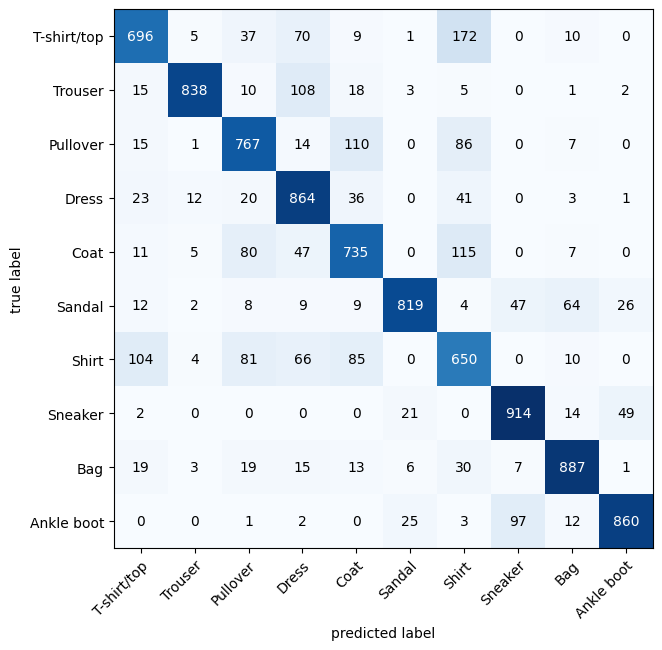

In [ ]:
# 3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=comfmat_tensor.numpy(), # confusion matrix
    class_names=class_name, # class names
    figsize=(10, 7)
)



### ข้อมูลจากภาพ Confusion Matrix:
- **แนวตั้ง (True Label):** ป้ายชื่อจริงของข้อมูล (true labels)
- **แนวนอน (Predicted Label):** ป้ายชื่อที่โมเดลทำนาย (predicted labels)

### การวิเคราะห์แต่ละจุดใน Confusion Matrix:
- **Diagonal (เส้นทแยงมุม):** จำนวนที่โมเดลทำนายได้ถูกต้องสำหรับแต่ละคลาส เช่น:
  - T-shirt/top ถูกทำนายถูกต้อง 696 ครั้ง
  - Trouser ถูกทำนายถูกต้อง 838 ครั้ง
  - Ankle boot ถูกทำนายถูกต้อง 860 ครั้ง
- **Non-diagonal (นอกเส้นทแยงมุม):** จำนวนที่โมเดลทำนายผิดพลาด เช่น:
  - T-shirt/top ถูกทำนายเป็น Shirt 172 ครั้ง
  - Pullover ถูกทำนายเป็น Coat 110 ครั้ง
  - Sneaker ถูกทำนายเป็น Ankle boot 49 ครั้ง

### ข้อมูลเพิ่มเติม:
- **ความแม่นยำ (Accuracy):** ค่าในเส้นทแยงมุมสูงแสดงถึงความแม่นยำสูงของโมเดลในการทำนายคลาสนั้น ๆ
- **ข้อผิดพลาด (Errors):** ค่าในช่องที่ไม่อยู่บนเส้นทแยงมุมแสดงถึงข้อผิดพลาดที่โมเดลทำในการทำนาย

### การประเมินผล:
1. **T-shirt/top กับ Shirt:** โมเดลมีแนวโน้มทำนาย T-shirt/top เป็น Shirt อยู่บ่อยครั้ง (172 ครั้ง) ซึ่งอาจบ่งบอกถึงลักษณะที่คล้ายคลึงกันระหว่างสองคลาสนี้
2. **Pullover กับ Coat:** โมเดลมีแนวโน้มทำนาย Pullover เป็น Coat อยู่บ่อยครั้ง (110 ครั้ง) ซึ่งอาจเป็นเพราะลักษณะของเสื้อทั้งสองชนิดมีความคล้ายกัน
3. **Sneaker กับ Ankle boot:** โมเดลมีแนวโน้มทำนาย Sneaker เป็น Ankle boot อยู่บ้าง (49 ครั้ง) ซึ่งอาจเป็นเพราะลักษณะของรองเท้าทั้งสองชนิดมีความคล้ายคลึงกัน

### สรุป:
Confusion Matrix นี้แสดงให้เห็นว่าโมเดลทำงานได้ดีในบางคลาสแต่มีข้อผิดพลาดในบางคลาส ซึ่งอาจเกิดจากความคล้ายคลึงกันของลักษณะในคลาสนั้น ๆ การปรับปรุงโมเดลอาจพิจารณาจากการเข้าใจข้อผิดพลาดเหล่านี้และพัฒนาให้โมเดลเรียนรู้คุณลักษณะเฉพาะของแต่ละคลาสได้ดียิ่งขึ้น

#10.saving & loading a training model

In [ ]:
from pathlib import Path

# 1. Create models directory (if it doesn't exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
model = model_2  # เปลี่ยนชื่อ model_2 เป็นชื่อที่สื่อความหมาย เช่น linear_regression_model
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
model_2.state_dict()

In [ ]:
#Create a new instance (ตั้งค่าให้เหมือนข้อ 7.)
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_name)).to(device)

# Load the saved state_dict of model_2 (this will update the loaded_model_2)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Check the loaded model
loaded_model_2.to(device)



FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#Evaluate loaded model
model_2_loaded_results = eval_model(model=loaded_model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_loaded_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.304980993270874,
 'model_acc': 88.99760383386581}

In [ ]:
#Evaluate loaded model
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.304980993270874,
 'model_acc': 88.99760383386581}

In [ ]:
torch.isclose(torch.tensor(model_2_loaded_resultss["model_loss"]),
              torch.tensor(model_2_results["model_loss"]),
              atol=1e-02,
              )

tensor(True)